# Cluster visualization

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib.colors import ListedColormap
from calibration import read_calibration_parameters, linear_calibration

In [39]:
# load training set
df_train = pd.read_csv('data/training_set_day3.csv')

# load clustered data
df = pd.read_csv('data/data_clyc_with_cluster_day3.csv')

In [6]:
df_train

,board,channel,flag,timestamp,energy,energy_short,energy_calib,energy_short_calib,psd,psd_calib,id,cluster
0,1,2,16384,12201638019890685,67,25,309.432911,96.774684,0.626866,0.687251,2543456,0
1,1,2,16384,14246530221514452,90,36,425.888608,152.470886,0.600000,0.641994,2919261,0
2,1,2,16384,7357116169903824,778,320,3909.432911,1590.445570,0.588689,0.593177,1628313,0
3,1,2,16384,5877524628090956,672,282,3372.724051,1398.040506,0.580357,0.585486,1326702,0
4,1,2,16384,1899935884029406,80,31,375.255696,127.154430,0.612500,0.661153,469820,0
...,...,...,...,...,...,...,...,...,...,...,...,...
49995,1,2,16384,2296711724449789,960,305,4830.951899,1514.496203,0.682292,0.686501,561068,1
49996,1,2,16384,2130142119705248,62,23,284.116456,86.648101,0.629032,0.695026,522630,0
49997,1,2,16384,5721576667588029,68,27,314.496203,106.901266,0.602941,0.660087,1295863,0
49998,1,2,16384,14429871887556342,66,27,304.369620,106.901266,0.590909,0.648778,2953198,0


In [7]:
df

,board,channel,flag,timestamp,energy,energy_short,energy_calib,energy_short_calib,psd,psd_calib,id,cluster
0,1,2,16384,3373955702,184,73,901.837975,339.812658,0.603261,0.623200,0,0
1,1,2,16384,10480929968,80,32,375.255696,132.217722,0.600000,0.647660,1,0
2,1,2,16384,13610683468,116,47,557.534177,208.167089,0.594828,0.626629,2,0
3,1,2,16384,24705541682,649,266,3256.268354,1317.027848,0.590139,0.595541,3,0
4,1,2,16384,29984914781,42,18,182.850633,61.331646,0.571429,0.664581,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2952717,1,2,16384,15868456498226562,96,39,456.268354,167.660759,0.593750,0.632539,3223244,0
2952718,1,2,16384,15868464323128029,104,47,496.774684,208.167089,0.548077,0.580963,3223245,0
2952719,1,2,16384,15868474285595217,62,26,284.116456,101.837975,0.580645,0.641563,3223246,0
2952720,1,2,16384,15868474360183998,54,21,243.610127,76.521519,0.611111,0.685885,3223247,0


In [25]:
# param_clyc = read_calibration_parameters(
#     "./calibration-parameters/clyc_linear_parameters.txt"
# )

# df_train.loc[:, "energy_calib"] = linear_calibration(df_train["energy"], param_clyc)
# df.loc[:, "energy_calib"]       = linear_calibration(df["energy"], param_clyc)

In [8]:
# make a color palette that will be used for the plot
# the two colors are tab:blue and tab:orange

palette = ListedColormap(['tab:blue', 'tab:orange'])
sns_palette = sns.color_palette(["tab:blue", "tab:orange"])

## Training data

In [9]:
# rename the cluster column into "Particle"
# rename 0's with "Gamma" and 1's with "Neutron"

df_train = df_train.rename(columns={"cluster": "Particle"})
df_train.loc[df_train["Particle"] == 0, "Particle"] = "Gamma"
df_train.loc[df_train["Particle"] == 1, "Particle"] = "Neutron"

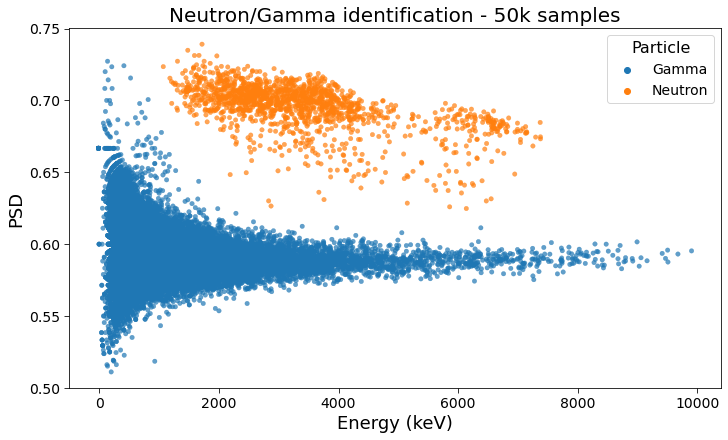

In [11]:
fig, ax = plt.subplots(figsize=(10, 6), constrained_layout=True)

sns.scatterplot(x='energy_calib', y='psd', hue='Particle', data=df_train, palette=sns_palette, alpha=0.7, edgecolor=None, ax=ax, s=20, legend=True)


ax.set_title('Neutron/Gamma identification - 50k samples', fontsize=20)
ax.set_xlabel('Energy (keV)', fontsize=18)
ax.set_ylabel('PSD', fontsize=18)

ax.tick_params(axis="both", which="major", labelsize=14, length=5)

ax.legend(fontsize=14, title_fontsize=16, title="Particle")

# save the figure
fig.savefig('plots/training-cluster-day3.png', dpi=300, facecolor='w')

plt.show()

## Full data

In [40]:
df = df.rename(columns={"cluster": "Particle"})
df.loc[df["Particle"] == 0, "Particle"] = "Gamma"
df.loc[df["Particle"] == 1, "Particle"] = "Neutron"

In [43]:
original_labels = df["Particle"].values

In [44]:
# reset label
df.loc[:, "Particle"] = original_labels

In [53]:
# FINE TUNING

def line_from_points(p1, p2):
    m = (p2[1] - p1[1]) / (p2[0] - p1[0])
    q = p1[1] - m*p1[0]
    return m, q

m, q = line_from_points((650, 0.75), (800, 0.70))
# if a gamma is above the line, and has energy between 0 and 2000 keV, it is a neutron
df.loc[(df["Particle"] == "Gamma") & (df["psd"] > m*df["energy_calib"] + q) & (df["energy_calib"] > 650) & (df["energy_calib"] < 800), "Particle"] = "Neutron"

m, q = line_from_points((800, 0.70), (2000, 0.65))
# if a gamma is above the line, and has energy between 0 and 2000 keV, it is a neutron
df.loc[(df["Particle"] == "Gamma") & (df["psd"] > m*df["energy_calib"] + q) & (df["energy_calib"] > 800) & (df["energy_calib"] < 2000), "Particle"] = "Neutron"

m, q = line_from_points((800, 0.70), (1800, 0.65))
# if a gamma is above the line, and has energy between 0 and 2000 keV, it is a neutron
df.loc[(df["Particle"] == "Gamma") & (df["psd"] > m*df["energy_calib"] + q) & (df["energy_calib"] > 800) & (df["energy_calib"] < 1800), "Particle"] = "Neutron"

# if a gamma has psd > 0.615 and energy between 3800 and 8000 keV, it is a neutron
df.loc[(df["Particle"] == "Gamma") & (df["psd"] > 0.615) & (df["energy_calib"] > 4000) & (df["energy_calib"] < 8000), "Particle"] = "Neutron"

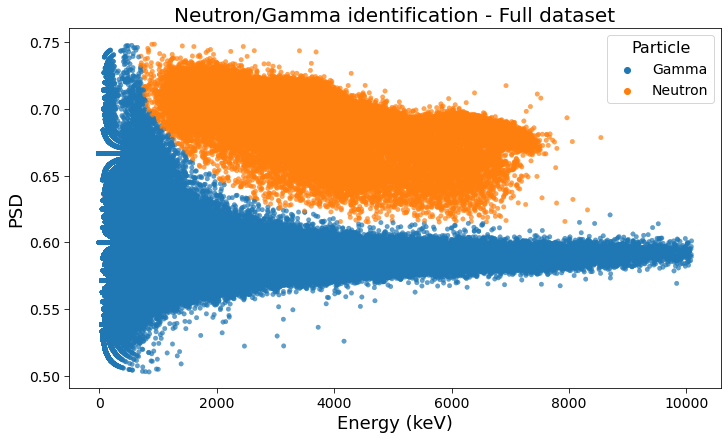

In [55]:
fig, ax = plt.subplots(figsize=(10, 6), constrained_layout=True)

sns.scatterplot(x='energy_calib', y='psd', hue='Particle', data=df, palette=sns_palette, alpha=0.7, edgecolor=None, ax=ax, s=20, legend=True)


ax.set_title('Neutron/Gamma identification - Full dataset', fontsize=20)
ax.set_xlabel('Energy (keV)', fontsize=18)
ax.set_ylabel('PSD', fontsize=18)


ax.tick_params(axis="both", which="major", labelsize=14, length=5)

ax.legend(fontsize=14, title_fontsize=16, title="Particle", loc="upper right")

# save the figure
fig.savefig('plots/full-cluster-day3.png', dpi=300, facecolor='w')

plt.show()

In [56]:
df.to_csv('data/data_clyc_with_cluster_day3.csv', index=False)

In [57]:
df_day2 = pd.read_csv('data/data_clyc_with_cluster_day2.csv')
df_day3 = pd.read_csv('data/data_clyc_with_cluster_day3.csv')

# concatenate the two dataframes
df_full = pd.concat([df_day2, df_day3], ignore_index=True)
df_full

,board,channel,flag,timestamp,energy,energy_short,energy_calib,energy_short_calib,psd,psd_calib,id,Particle
0,1,2,16384,4000346264,173,70,846.141772,324.622785,0.595376,0.616349,0,Gamma
1,1,2,16384,6419772092,120,47,577.787342,208.167089,0.608333,0.639717,1,Gamma
2,1,2,16384,7266955342,104,41,496.774684,177.787342,0.605769,0.642117,2,Gamma
3,1,2,16384,7785613483,344,146,1711.964557,709.432911,0.575581,0.585603,3,Gamma
4,1,2,16384,7840196202,431,177,2152.470886,866.394937,0.589327,0.597488,4,Gamma
...,...,...,...,...,...,...,...,...,...,...,...,...
4936371,1,2,16384,15868456498226562,96,39,456.268354,167.660759,0.593750,0.632539,3223244,Gamma
4936372,1,2,16384,15868464323128029,104,47,496.774684,208.167089,0.548077,0.580963,3223245,Gamma
4936373,1,2,16384,15868474285595217,62,26,284.116456,101.837975,0.580645,0.641563,3223246,Gamma
4936374,1,2,16384,15868474360183998,54,21,243.610127,76.521519,0.611111,0.685885,3223247,Gamma


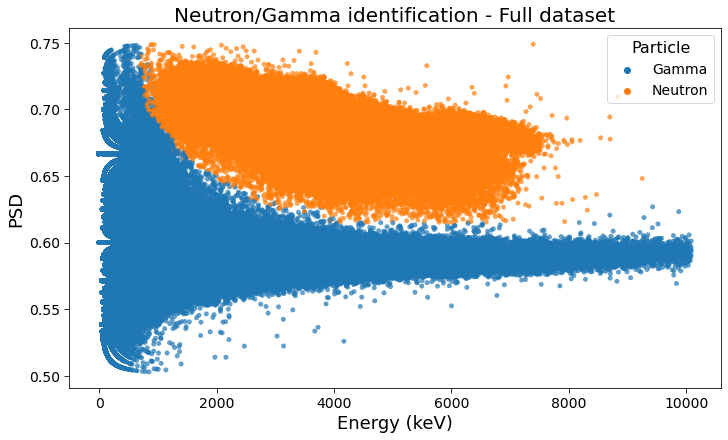

In [58]:
fig, ax = plt.subplots(figsize=(10, 6), constrained_layout=True)

sns.scatterplot(x='energy_calib', y='psd', hue='Particle', data=df_full, palette=sns_palette, alpha=0.7, edgecolor=None, ax=ax, s=20, legend=True)


ax.set_title('Neutron/Gamma identification - Full dataset', fontsize=20)
ax.set_xlabel('Energy (keV)', fontsize=18)
ax.set_ylabel('PSD', fontsize=18)


ax.tick_params(axis="both", which="major", labelsize=14, length=5)

ax.legend(fontsize=14, title_fontsize=16, title="Particle", loc="upper right")

# save the figure
fig.savefig('plots/full-cluster-all.png', dpi=300, facecolor='w')

plt.show()